<a href='https://fihm.ai/' target='_blank'><img src='https://i.postimg.cc/Y25KhxPM/q.png' border='0' width = 250 alt='q'/></a>

## ` سلسلة فهم لتعلم الآلة - الجزء الثالث - أهمية الميزات `
## `Fihm Series for Machine Learning - Part 3 - Feature Importance`
## `فهم أثر المزايا على التوقع - Interpreting How Features Affect Prediction`

___
### `مقدمة`
`أهلا بكم في الجزء الثالث من سلسلة فهم لتعلم الآلة. تحدثنا في الجزء الأول عن الإنحدار الخطي والذي يستخدم في توقع القيم المتصلة مثل أسعار السيارات أو العقار. ثم في الجزء الثاني استكشفنا خوارزميات التصنيف والتي تتوقع تصنيف الأشياء بناء على البيانات المجمعة مثل تصنيف هل سيترك العميل الشركة أم لا؟ إن الأمر المشترك بين خوارزميات الانحدار الخطي و خوارزميات التصنيف - أي خوارزميات التعلم الآلي الخاضع للإشراف - هو أن هذه الخوارزميات تساعدنا أيضا على فهم أثر الميزات في عملية التوقع. وللتوضيح أكثر، ليست جميع الميزات ذات أهمية متساوية في عمليات التوقع، حيث أن بعض الميزات تساهم فعلا في إجراء التوقعات الصحيحة و على النقيض يوجد ميزات لا تأثر كثيرا في دقةالتوقع`

___
### `ماذا نريد أن نفعل؟`
`تذكر أننا في الجزء الثاني من السلسلة قمنا ببناء نموذج يقوم بتوقع من من عملاء الشركة سيترك الشركة (شركة اتصالات). الآن نحن نريد أن نفهم كيف يقوم النموذج بعمل هذا التوقع؟ وذلك من أجل فهم وتحديد ماهي الأسباب التي قد تجعل العميل يرغب في ترك الشركة ومن ثم معالجة تلك الأسباب إن أمكن `

`في درس اليوم سوف نستكشف سويًا منهجيتين أساسيتين لتفسير أهمية المزايا، ألا وهما`
____

`1 - Model-Agnostic Explanation Methods`

`وهي الأساليب عامة التي تناسب جميع أنواع التعلم الآلي الخاضع للإشراف. الأساليب العامة المستخدمة في درس اليوم هي`

`A - Feature Permutations`

`B - Partial Dependency Plot`

_____
`2 - Model-Specific Explanation Methods`

`المنهجية الثانية هي أساليب خاصة وفق نوع الخوارزمية المستعملة. حيث باختلاف الخوارزمية تختلف الطريقة، وفي درس اليوم سوف نستخدم`

`Logistic Regression Coefficients Interpretation`

_____

### `البيانات المستخدمة في هذا الدرس`

`في هذا الدرس سوف نستكمل استخدامنا لبيانات عملاء شركة الاتصال حيث أن هدفنا في هذا الدرس هو استخدام نماذج التصنيف لتحديد ماهي أهم الأسباب التي تدفع العملاء لترك الشركة؟ قمنا بالدرس الماضي بمعالجة البيانات وترميزها. ولذلك سوف نستخدم البيانات المعالجة والجاهزة من الدرس الماضي، تستطيع تحميل البيانات من هنا`

https://github.com/KAFSALAH/Fihm_Lessons/raw/master/ML_Series3_Feature_Importance/Churndata_clean.csv

In [1]:
import pandas as pd
df = pd.read_csv('https://github.com/KAFSALAH/Fihm_Lessons/raw/master/ML_Series3_Feature_Importance/Churndata_clean.csv')
df.head()

,gender,SeniorCitizen,Married,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,0,1,29.85,29.85,0,1,0,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,0,56.95,1889.50,0,0,1,0
2,1,0,0,0,2,1,1,1,2,2,1,1,0,1,53.85,108.15,0,0,1,1
3,1,0,0,0,45,0,0,1,2,1,2,2,1,0,42.30,1840.75,0,0,0,0
4,0,0,0,0,2,1,1,2,1,1,1,1,0,1,70.70,151.65,0,1,0,1


____
## `Methodology 1 - Model-Agnostic Explanation`

`المنهجية الأولى هي استخدام طرق التفسير اللانموذجية، وهي طرق غير مرتبطة بنموذجٍ محدد، حيث أننا نستطيع استعمالها مع كافة خوارزميات التعلم الخاضع للأشراف سواء كانت خوارزميات تصنيف أم انحدار خطيْ، ولهذا السبب سميت هذه الطرق باللانموذجية لعموم استخدامها`

___
### `Step One: Build a Random Forest Classifier  — الخطوة الأولى: بناء نموذج تصنيف باستخدام خوارزمية الغابة العشوائية`


` سوف نقوم أولا ببناء نموذج تصنيف باستخدام خوارزمية الغابة العشوائية باستخدام جميع المزايا الموجودة للتحقق من أثر كل ميزة، ويمكنك أيضا تجربة خوارزميات أخرى إن أردت`

In [2]:
# Data split 
X = df.loc[:, df.columns != 'Churn'] # Independent features 
y = df['Churn'] # Target features 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state = 123) 

`بما أننا نستخدم خوارزمية الغابة العشوائية نستطيع تدريب النموذج مباشرة بعد فصل البيانات دون الحاجة إلى توحييد المقايس `

`Random Forest does not require scaling`


In [3]:
# Train a random forest classifer 
from sklearn.ensemble import RandomForestClassifier 
random_forest_model = RandomForestClassifier(random_state = 123) # Setting random_state to 123 to have same results if we repeat the process
random_forest_model.fit(X_train, y_train) # training the model
random_forest_predicts = random_forest_model.predict(X_test) 

`ثم نقوم باختبار دقة النموذج المبدئية`

In [4]:
# Evaluate prediction results
from sklearn import metrics
metrics.accuracy_score(y_test, random_forest_predicts)

0.7876206700738216

___
### `Step Two: Use Feature Permutations to Find Feature Importance  — الخطوة الثانية: استخدام تبديل المزايا العشوائي لإيجاد أهمية الميزات`

`هذه هي الطريقة الأولى في طرق التفسير اللانموذجية. في هذه الطريقة نقوم باختبار دقة النموذج والحصول على نتيجة مبدئية،  وبعد ذلك نقوم بتغيير القيم بشكل عشوائي في عامود واحد فقط من أعمدة التدريب، ثم نقوم بتدريب النموذج من جديد وقياس الدقة مرة أخرى، إذا ارتفعت قيمة الخطأ (أي أصبحت دقة النموذج أقل) فهذا يعني أن العامود الذي تمت تغيير قيمه هو عامود ذو أهمية وذلك لأننا عندما قمنا بتغيير قيمه أصبحنا نخطئ بالتوقع أكثر. بعد ذلك، نعود إلى جدول البيانات الأصلي ونقوم بتغيير قيم عامود آخر بشكل عشوائي وننظر مرة أخرى إلى دقة النموذج: هل ارتفعت قيمة الخطأ أم لا؟ إذا لم تتغير دقة النموذج (أي أن قيمة الخطأ ما زالت نفسها) فهذا يعني أن هذا العامود لا يشكل أهمية كبيرة في توقع دقة النموذج. ثم نعيد الكرة إلى أن يتم تجربة جميع الأْعمدة`

`من خلال هذه التجارب، نستطيع أن نرى أثر تغيير قيم كل ميزة (عامود) بوضوح على دقة التوقع، وكلما كان أثر الميزة أكبر (خطأ أكبر) كل ما كانت ذات أهمية أكبر من أجل إيجاد دقة عالية`

In [5]:
# Use permutation_importance to calculate permutation feature importances
from sklearn.inspection import permutation_importance
feature_importances = permutation_importance(estimator = random_forest_model, # Used model
                                             X = X_train, #Feature permutations will be applied on the training set
                                             y = y_train,
                                             n_repeats = 5, # try 5 different permutations
                                            random_state=123,
                                            n_jobs=2)

`نلاحظ أننا قمنا بوضع قيمة`

`n_repeats = 5`

`مما يعني أننا سوف نقوم بتجربة تغيير قيمة كل عامود بشكل عشوائي خمس مرات. ثم سوف نقوم بتسجيل قيمة الخطأ في كل مرة. فلنتحقق من شكل النتيجة التي ظهرت من خلال طريقة تبديل المزايا`

In [6]:
feature_importances.importances.shape

(19, 5)

`نلاحظ أن النتيجة هي عبارة عن مصفوفة تحتوي على 19 صف و 5 عواميد. ماذا تمثل هذه الأرقام؟`

In [7]:
feature_importances.importances

array([[0.03142749, 0.03256342, 0.03351003, 0.03218478, 0.03445665],
       [0.0238546 , 0.02688376, 0.02517986, 0.02480121, 0.02480121],
       [0.02593715, 0.02593715, 0.02536918, 0.0255585 , 0.02688376],
       [0.02120409, 0.02234002, 0.02139341, 0.02271867, 0.02309731],
       [0.11170011, 0.1107535 , 0.10961757, 0.10961757, 0.11397198],
       [0.00397577, 0.00454373, 0.00416509, 0.00359712, 0.00359712],
       [0.03502461, 0.03464597, 0.03634987, 0.03729648, 0.03597122],
       [0.08727755, 0.0868989 , 0.09163196, 0.08803484, 0.09636501],
       [0.03445665, 0.03123817, 0.03085952, 0.03275275, 0.02858766],
       [0.02783037, 0.02707308, 0.02650511, 0.02631579, 0.02707308],
       [0.02328663, 0.02025748, 0.01893222, 0.02082544, 0.01931087],
       [0.0272624 , 0.03123817, 0.02839833, 0.02820901, 0.02783037],
       [0.10791367, 0.10602045, 0.10318061, 0.10355926, 0.11397198],
       [0.04562666, 0.04751988, 0.05035971, 0.04108292, 0.04562666],
       [0.10299129, 0.10620977, 0.

`إن كل صف يمثل ميزة (عامود) في جدول البيانات الخاص لدينا، وإن عدنا إلى جدول البيانات الخاص بنا سوف نجد أن الميزة الأولى هي ميزة `

`gender`

`ولذلك فإن الصف الأول يمثل قيم الأهمية بالنسبة لعامود الجنس. إذا لماذا لدينا خمسة أعمدة لكل ميزة؟ لدينا خمسة أعمدة لأننا قمنا بعمل خمس تغيرات عشوائية (أي خمس اختبارات مختلفة) لكل عامود عندما اخترنا `

`n_repeats = 5`


`ولذلك لدينا خمس قيم أهمية لكل ميزة، سوف نأخذ المتوسط لكل صف ورؤية ماهي أهمية كل عامود كالتالي`

In [8]:
feature_importances.importances_mean

array([0.03282847, 0.02510413, 0.02593715, 0.0221507 , 0.11113215,
       0.00397577, 0.03585763, 0.09004165, 0.03157895, 0.02695949,
       0.02052253, 0.02858766, 0.10692919, 0.04604317, 0.10533889,
       0.0994699 , 0.01166225, 0.05535782, 0.01332828])

`ومن أجل تلخيص أهمية الميزات بشكل مفهوم وسلس. سوف نقوم بتمثيلها برسم بياني باستخدام الوظيفة التالية`

In [9]:
import matplotlib.pyplot as plt
def visualize_feature_importance(importance_array):
    # Sort the array based on mean value
    sorted_idx = importance_array.importances_mean.argsort()
    # Visualize the feature importances using boxplot
    fig, ax = plt.subplots()
    fig.set_figwidth(16)
    fig.set_figheight(10)
    fig.tight_layout()
    ax.boxplot(importance_array.importances[sorted_idx].T,
               vert=False, labels=X_train.columns[sorted_idx])
    ax.set_title("Permutation Importances (using the train set)")
    plt.show()

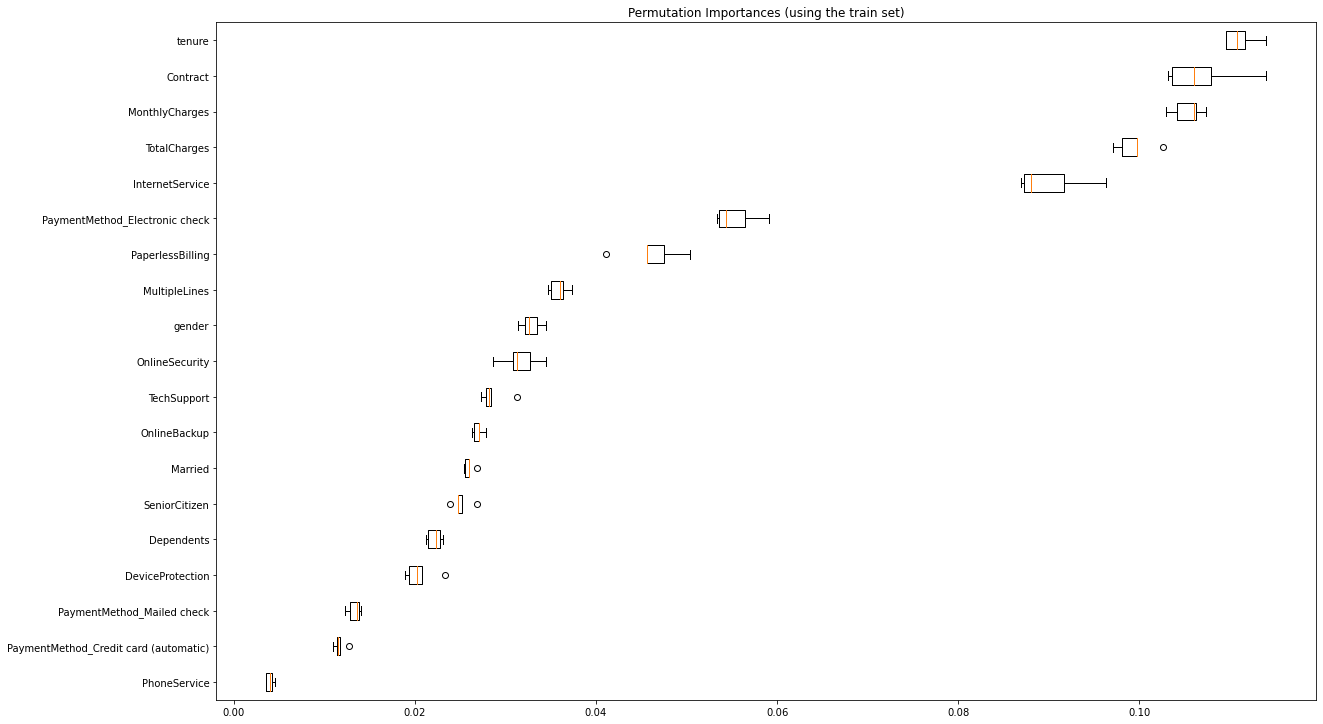

In [10]:
visualize_feature_importance(feature_importances)

`نستنتج من الصورة التالي: إن عامود الـ`

`tenure`

`هو أهم عامود يأثر على دقة النموذج، يليه`

`Contract`

`ثم`

`MonthlyCharges`

`وهكذا وصولا إلى عامود`

`PhoneService`

`حيث أنه ذو الأهمية الأقل بين جميع الأعمدة`

___
` الأن وبعد أن حددنا ماهي أهم الميزات بالنسبة لدقة النموذج، نريد أن نرى ماهو أثر هذه الميزات على العامود المستهدف؟ أي بمعنى آخر: نريد أن نرى هل هذه الميزات تجعل العميل يترك الشركة أم يبقى فيها`

___
### `Step Three : Use PDP to Find how Features Affect Prediction  — الخطوة الثالثة: استخدام الرسم الاعتمادي الجزئي لإيجاد أثر المزايا على التوقع`


`الطريقة اللانموذجية الثانية هي الرسم الاعتمادي الجزئي`

`Partial Dependence Plot`

`ومن خلالها نقوم برسم أثر الميزة على قيمة العامود المستهدف (ألا وهو ترك العميل للشركة). ومن النظر إلى الرسمة الناتجة نستطيع أن نرى إن كانت زيادة قيمة الميزة تجعل العميل يترك الشركة أم يبقى فيها`

______
`فلنقم باستكشاف أثر أهم ثلاث ميزات في دقة النموذج.  بناءً على اختبار تغيير قيم المزايا العشوائي الذي قمنا به في الخطوة الثانية إن أهم ثلاث مزايا هي مدة الاشتراك ونوع العقد والرسوم الشهرية`

In [11]:
important_features = ['tenure','Contract','MonthlyCharges']

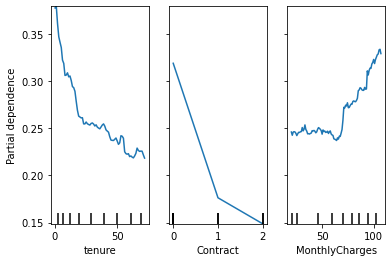

In [12]:
from sklearn.inspection import PartialDependenceDisplay 
PartialDependenceDisplay.from_estimator(estimator=random_forest_model, 
                        X=X_train, 
                        features=important_features,
                        random_state=123);

#### `Plot 1 - tenure vs Churn overall central tendency`

`نلاحظ التالي بالنسبة للرسمة الأولى : كل ما ارتفعت قيمة عامود مدة الاشتراك `

`tenure`

` كل ما قلت احتمالية العميل لترك الشركة. ولذلك نستطيع أن نستنتج أن العملاء الجدد هم الأغلب لترك خدمات الشركة. وربما لمعالجة مثل هذه المعضلة قد تقوم الشركة بتوجيه عروض خاصة للمشتركين الجدد من أجل المحافظة عليهم`


______

#### `Plot 2 - Contract vs Churn overall central tendency`
`نلاحظ أيضا نمط مشابه لميزة نوع العقد`

`Contract`

`حيث أن هناك ثلاث قيم لهذه الميزة كالتالي`

`0:'Month-to-month'`

`1:'One year'`

`2:'Two year'`

`مما يعني أن العملاء الذين يستخدمون عقود السنتين هم أقل نسبة لترك الشركة على غرار العملاء الذين يستخدمون العقود الشهرية`


_____

#### `Plot 3 - MonthlyCharges vs Churn overall central tendency`

`نلاحظ أيضا من الرسمة الثالثة أن ارتفاع الرسوم الشهرية يرفع من احتمالية ترك العميل للشركة أيضا `

_______
## `Methodology 2 - Model-Specific Explanation`

`المنهجية الثانية في تفسير أثر الميزات هي الطرق النموذجية والتي تعتمد على نوع الخوارزم المستخدم. فمن خلال فهم  الرياضيات وراء بناء النموذج نستطيع فهم أثر الميزات. مثالنا اليوم سوف يكون باستخدام تفسير معاملات خوارزمية الانحدار الخطي اللوجستي`

`Logistic Regression`

_____
`
لماذا نحن مهتمون بمعاملات الانحدار الخطي؟ حسنا لقد تحدثنا سابقا أن خوارزمية الانحدار الخطي اللوجستي تعطي احتمالية حدوث الشيء، أي في حالتنا هذه: ماهي احتمالية ترك العميل للشركة؟ فإن كانت الاحتمالية تساوي 0.5 أو أعلى يتم تصنيف العميل على انه سوف يترك الشركة. وإن كانت الاحتمالية أقل من 0.5 يتم تصنيف العميل على أنه سوف يبقى. هذه الاحتمالية يتم حسابها عن طريق المعادلة التالية`


<div>
<img src="https://i.ibb.co/KXBbsbK/Screen-Shot-2023-01-01-at-01-44-57.png" width = 550>
</div>



`محط اهتمامنا هو قوى (أُسْ) الـ`

`e`

`في المعادلة. حيث أن الأس يحتوي على نوعين من المتغيرات كالتالي `

`1 - x1,x2,...xn`

`وهي المتغيرات التي تمثل مزاياالجدول كالتالي`

`x1 > gender column, x2 > SeniorCitizen column, ..., x19 > PaymentMethod_Mailed check column`

`2 - b1,b2,...b19`

`وهي معاملات الأعمدة. إذا ارتفعت قيمتها فإن قيمة الاحتمالية ترتفع، وإنا نقصت قيمتها فإن قيمة الاحتمالية تنخفض. ولذلك فإن كان معامل الميزة إيجابي فهذا يعني أن الميزة تؤدي إلى ترك العميل للشركة، وإن كان معامل الميزة سلبي فهذا يعني أن الميزة تؤدي إلى المحافظة على العميل`

___
### `Step Four : Logistic Regression Coefficients Interpretation  — الخطوة الثالثة: تفسير معاملات خوارزمية الانحدار الخطي اللوجستي`

`بما أننا نستعمل الانحدار الخطي اللوجستي، فنلقم بإعادة وزن الميزات`

`Feature scaling`

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

`والآن فلنقم بتدريب النموذج واختبار دقته`

In [14]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train_s, y_train)
lr_preds = lr_model.predict(X_test_s)
metrics.accuracy_score(y_test, lr_preds)

0.7995457126632595

`الآن وبعد تدريب النموذج، نريد النظر إلى قيم المعاملات عن طريق استخدام الوظيفة التالية`

In [15]:
# Extract and sort feature coefficients
def get_feature_coefs(regression_model):
    coef_dict = {}
    # Filter coefficients less than 0.01
    for coef, feat in zip(regression_model.coef_[0, :], X_test.columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

In [16]:
coef_dict = get_feature_coefs(lr_model)
coef_dict

{'tenure': -1.3487182568125111,
 'Contract': -0.6107493125485275,
 'PhoneService': -0.3270274229853171,
 'OnlineSecurity': -0.22356607771812895,
 'TechSupport': -0.2103647538624409,
 'OnlineBackup': -0.09339092510287739,
 'Dependents': -0.07718394990540296,
 'PaymentMethod_Mailed check': -0.03588622997524679,
 'PaymentMethod_Credit card (automatic)': -0.0317533114880288,
 'DeviceProtection': -0.0267283247780332,
 'Married': -0.020423735755089538,
 'MultipleLines': 0.08805581177325512,
 'SeniorCitizen': 0.10644701885406829,
 'PaymentMethod_Electronic check': 0.1516263061710412,
 'PaperlessBilling': 0.16466604526038875,
 'MonthlyCharges': 0.39402139769831473,
 'TotalCharges': 0.5575514307054046,
 'InternetService': 0.5820664449797841}

`ولسهولة تفسير المعاملات، نستطيع رسم قيمهم باستخدام الوظيفة التالية`

In [17]:
import numpy as np
# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

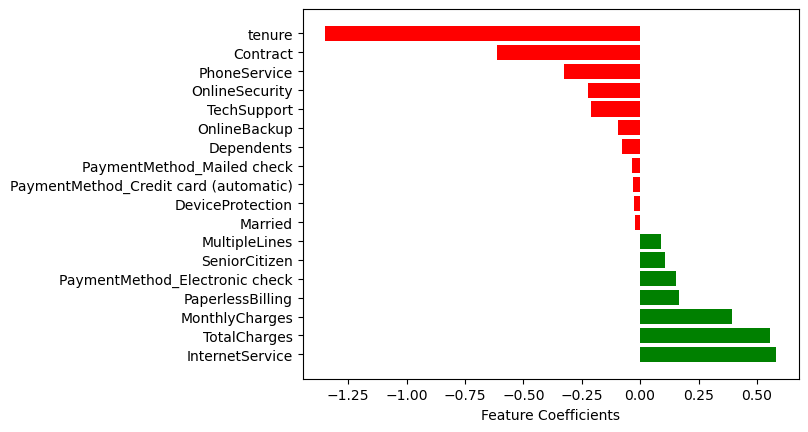

In [18]:
visualize_coefs(coef_dict)  # Now after finding features coefficients, it become very easy to interpret.

_____
###  `القيم السلبية`

`نلاحظ أن ميزة الـ`

`tenure`

`أي مدة اشتراك العميل هي أكبر قيمة سلبية، ويعني أنها أكثر قيمة تقلل من احتمالية ترك العميل للشركة، وهو أيضا ما تم استنتاجه من خلال طريقة الـ`

`Feature Permutations and PDP`


_____

### `القيم الإجابية`
`من الناحية الأخرى، تمثل القيم الإيجابية المزايا التي تزيد من فرصة جعل العميل يترك الشركة `


`أعلى ثلاث ميزات ذات معاملات إيجابية هي`

`MonthlyCharges, TotalCharges, InternetService`



`حسنا. نستطيع استنتاج أنه كل ما ارتفعت المصارف الشهرية أو المصاريف الكلية فإن فرصة ترك العميل للشركة ترتفع. ولكن ماذا عن عامود خدمة الإنترنت؟`

`InternetService`

`فلنقم بالتحقق من قيم هذا العمود ومحاولة تفسيرها`

`0: No internet service`

`1: DSL`

`2: Fiber optic`

`إذا: نسنتج أن عملاء الألياف البصرية هم الأكثر ترك لخدمات الشركة مقارنة بعملاء خدمات الانترنت عن طريق الشبكات النحاسية الدي إس إل. وقد يكون هذا بسبب غلاء أسعار الألياف البصرية أو أسباب أخرى كجودة الألياف`

______
### `Bonus Step: Selecting only important features —  خطوة إضافية: اختيار المزايا ذات الأهمية الكبرى فقط `

`الآن، سنقوم باستخدام أربعة ميزات فقط من أجل تدريب نموذج تعلم الآلة. سوف نقوم بأخذ أقل قيمتين سلبتين و أعلى قيمتين إيجابيتين، ومن ثم اختبار دقة النموذج كالتالي`

In [19]:
df = pd.read_csv('https://github.com/KAFSALAH/Fihm_Lessons/raw/master/ML_Series3_Feature_Importance/Churndata_clean.csv')
important_features = ['tenure','Contract','TotalCharges','InternetService','Churn']

small_data = df[important_features]

small_data.head()

,tenure,Contract,TotalCharges,InternetService,Churn
0,1,0,29.85,1,0
1,34,1,1889.50,1,0
2,2,0,108.15,1,1
3,45,1,1840.75,1,0
4,2,0,151.65,2,1


In [20]:
# Data split
X = small_data.loc[:, small_data.columns != 'Churn']
y = small_data['Churn'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state = 123) 

In [21]:
# Data scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [22]:
# Model training and validation
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train_s, y_train)
lr_preds = lr_model.predict(X_test_s)
metrics.accuracy_score(y_test, lr_preds)

0.7853492333901193

`نلاحظ أننا على الرغم من أننا استخدمنا 4 مزايا فقط لتدريب النموذج إلا أننا حافظنا تقريبا على نفس الدقة. وذلك لأن هذه المزايا الأربعة هي التي تؤثر بشكل كبير على دقة النموذج على غرار باقي المزايا. إن التخلص من المزايا ذات الأهمية المنخفضة يساعد على تقليل الوقت المستغرق في بناء النماذج أو استخدامها، بل وفي بعض الأحيان يساهم في رفع دقة النموذج `

___
###  `نصيحة فهم للتعلم`

` لاحظ أن النتائج بين الطرق النموذجية واللانموذجية تتشابه أحيانا وقد تختلف في أحيانا أخرى. ولذلك نحن ننصح بالتدرب على كلا الطرق من أجل استكشاف جميع الإجابات الممكنة. وفي كثير من الأحيان في مجال العمل يكون الإهتمام الأكبر في فهم أثر المزايا بدلا من دقة النماذج العالية. ولذلك فإن عالم البيانات الخبير مثل ما أنه يستطيع صناعة نماذج ذات دقة عالية،إلا أنه يعلم أيضا كيف يفسر أثر الميزات في أداء النماذج، لأنه يهتم بفهم أثر البيانات كما يهتم بدقة النموذج `

___
##  `ماذا تعلمنا؟`
#####     `هناك معيارين مهمين في نماذج التعلم الآلي الخاضع للإشراف ألا وهما الدقة والفهم • `
##### `Peformance and interpretability`
#####   ` • في بعض الأحيان يكون الأداء هو الهدف الأساسي، ولذلك نعمل على جعل النموذج ذو دقة عالية جدا حتى ولو لم نستطع فهم كيف يعمل تماما (مثل خوارزميات التعلم العميق)  `
#####   `وفي بعض الأحيان فهم النموذج يكون أولى من دقة النموذج، ولذلك لا نهتم كثيرا في الدقة ولكن نهتم أن نفهم أثر الميزات في كيفية عمل النموذج  • ` 
#####     ` هناك طرق متعددة لفهم النماذج وأثر المزايا فيها • `

#####     ` الطرق إما أن تكون عامة (تناسب معظم الخوارزميات) • `
##### `Feature Permutation or Partial Dependence Plot`
#####     `   أو طرق خاصة حسب الخوارزمية المستعملة مثل •`
#####     `  Features Coefficients in Logistic Regression`